In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Performing EDA

In [4]:
data.shape

(5000, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
data.nunique()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [8]:
data['Avg. Area Number of Bedrooms']

0       4.09
1       3.09
2       5.13
3       3.26
4       4.23
        ... 
4995    3.46
4996    4.02
4997    2.13
4998    5.44
4999    4.07
Name: Avg. Area Number of Bedrooms, Length: 5000, dtype: float64

In [9]:
data['Avg. Area Number of Bedrooms'] = data['Avg. Area Number of Bedrooms'].apply(lambda x: int(str(x)[0]))

In [10]:
data['Avg. Area Number of Bedrooms']

0       4
1       3
2       5
3       3
4       4
       ..
4995    3
4996    4
4997    2
4998    5
4999    4
Name: Avg. Area Number of Bedrooms, Length: 5000, dtype: int64

In [11]:
data.drop('Address', axis=1, inplace=True)

In [12]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4,26354.109472,6.309435e+05


In [17]:
data.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [16]:
data.duplicated().sum()

0

### Eliminating Outliers

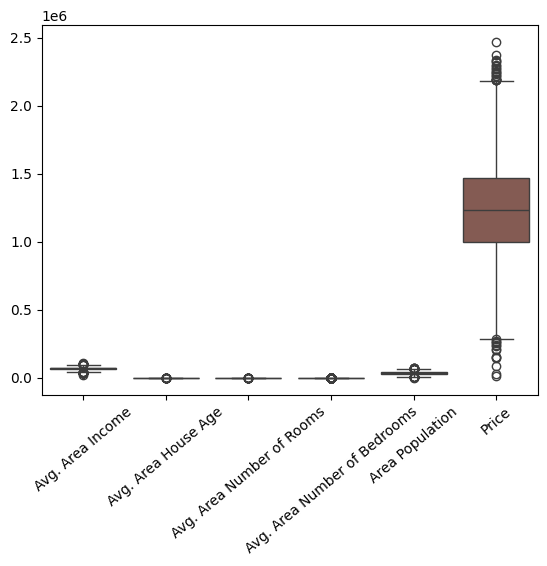

In [19]:
sns.boxplot(data)
plt.xticks(rotation=40)
plt.show()

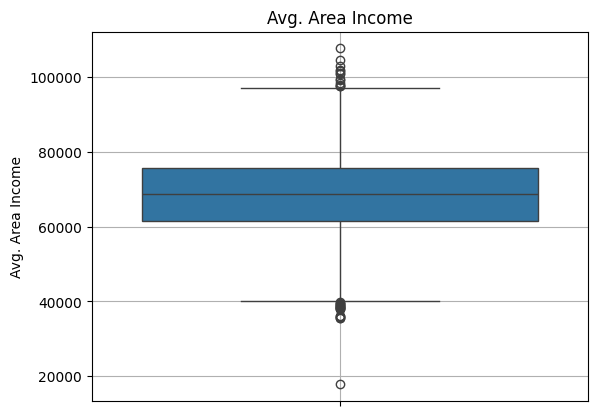

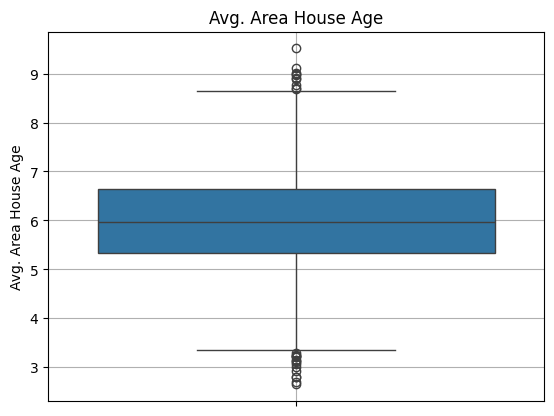

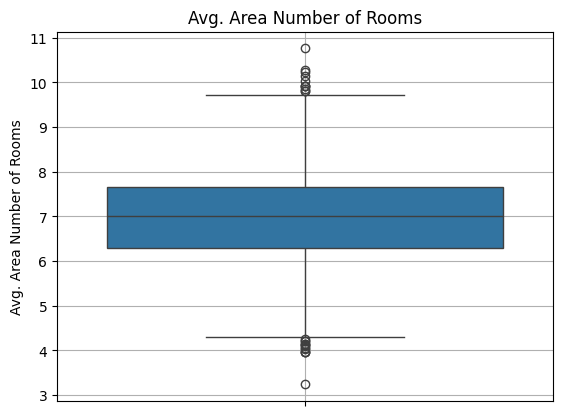

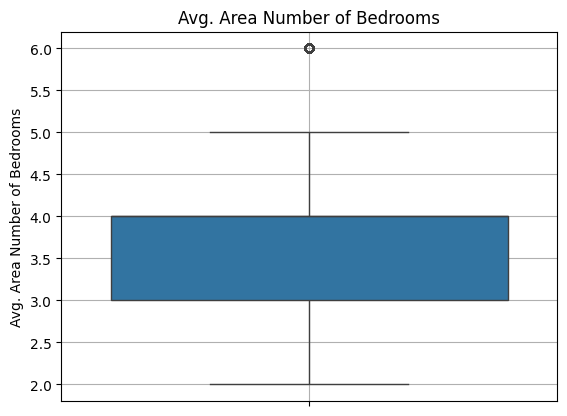

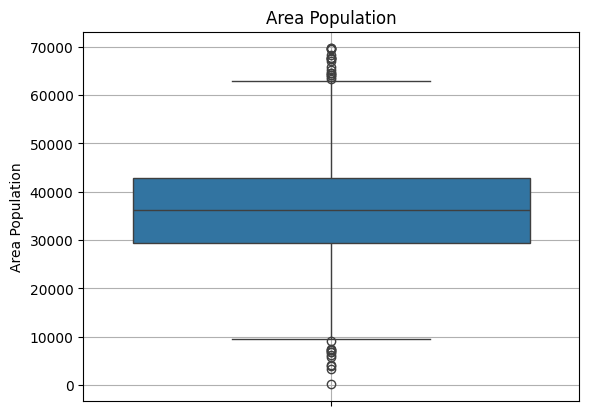

In [21]:
cols = data.columns
for i in cols:
    if i == 'Price':
        continue
    else:
        sns.boxplot(data[i])
        plt.title(i)
        plt.grid()
        plt.show()

In [23]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1
print("IQR:\n", IQR)

IQR:
 Avg. Area Income                 14302.776278
Avg. Area House Age                  1.328525
Avg. Area Number of Rooms            1.366621
Avg. Area Number of Bedrooms         1.000000
Area Population                  13457.362067
Price                           473633.069163
dtype: float64


In [25]:
lowerbound = Q1 - 1.5*IQR
upperbound = Q3 + 1.5*IQR

print("Lower Bounds: \n", lowerbound)
print()
print("Upper Bounds: \n", upperbound)

Lower Bounds: 
 Avg. Area Income                 40026.397972
Avg. Area House Age                  3.329495
Avg. Area Number of Rooms            4.249318
Avg. Area Number of Bedrooms         1.500000
Area Population                   9217.885601
Price                           287127.531305
dtype: float64

Upper Bounds: 
 Avg. Area Income                9.723750e+04
Avg. Area House Age             8.643597e+00
Avg. Area Number of Rooms       9.715803e+00
Avg. Area Number of Bedrooms    5.500000e+00
Area Population                 6.304733e+04
Price                           2.181660e+06
dtype: float64


In [27]:
data1 = data[~((data < lowerbound) | (data > upperbound)).any(axis=1)]

In [28]:
data1

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5,42625.620156,1.198657e+06


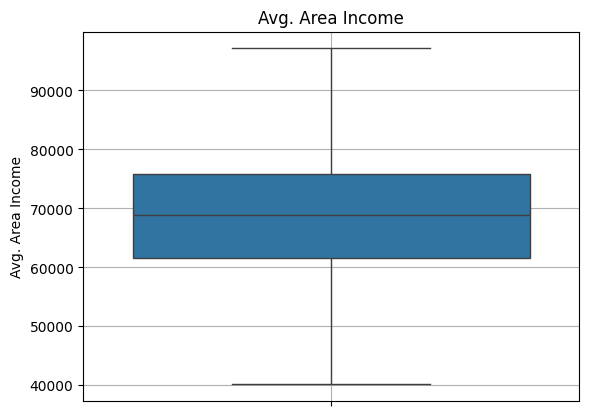

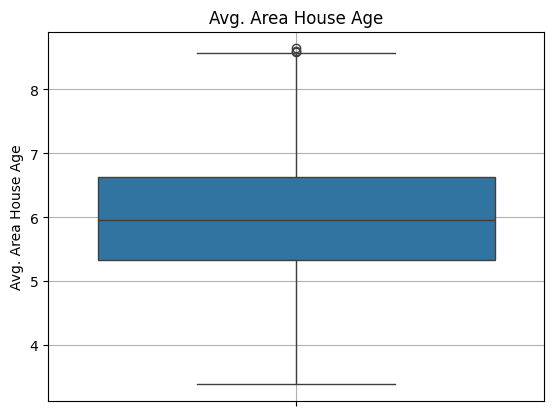

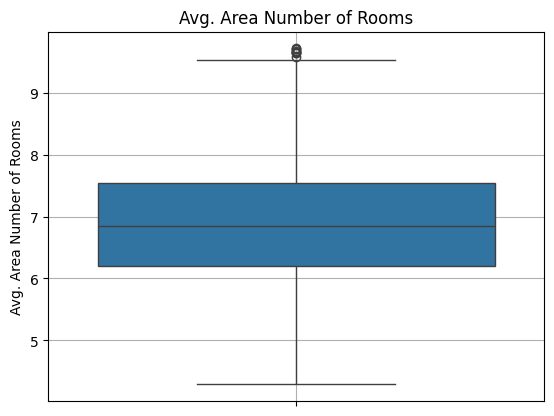

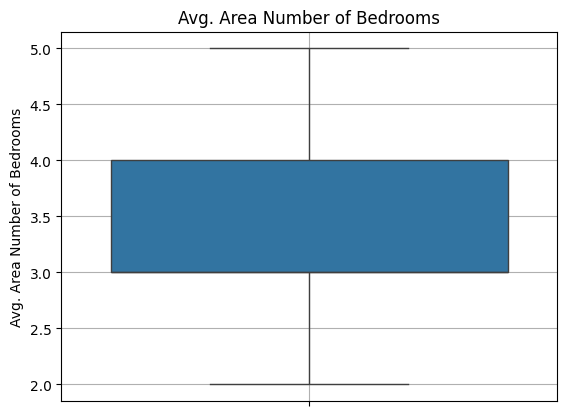

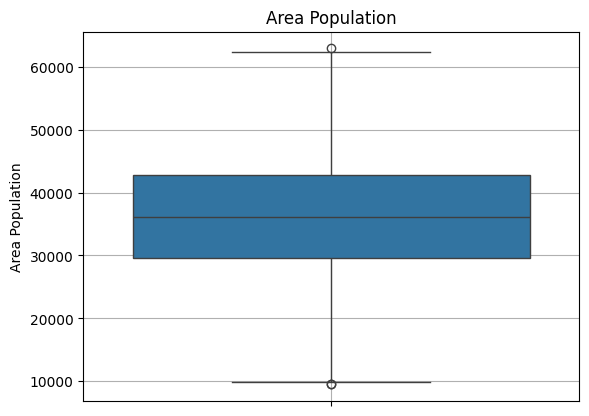

In [30]:
for i in cols:
    if i == 'Price':
        continue
    else:
        sns.boxplot(data1[i])
        plt.title(i)
        plt.grid()
        plt.show()

### Feature Selection

In [31]:
data.corr()['Price']

Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.172429
Area Population                 0.408556
Price                           1.000000
Name: Price, dtype: float64

### Splitting Independent/Dependent Data

In [32]:
x = data1.drop('Price', axis=1)
y = data1['Price']

### Splitting data into Train and Test

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Model Selection

### Linear Regression

In [34]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [36]:
print(f"Training Accuracy: {round(lr.score(x_train, y_train), 2)*100} %")
print(f"Test Accuracy: {round(lr.score(x_test, y_test), 2)*100} %")

Training Accuracy: 91.0 %
Test Accuracy: 91.0 %


### Decision Tree

In [44]:
dt = DecisionTreeRegressor(max_depth=9)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [45]:
print(f"Training Accuracy: {round(dt.score(x_train, y_train), 2)*100} %")
print(f"Test Accuracy: {round(dt.score(x_test, y_test), 2)*100} %")

Training Accuracy: 93.0 %
Test Accuracy: 77.0 %


### Random Forest

In [54]:
rf = RandomForestRegressor(max_depth=9)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=9)

In [55]:
print(f"Training Accuracy: {round(rf.score(x_train, y_train), 2)*100} %")
print(f"Test Accuracy: {round(rf.score(x_test, y_test), 2)*100} %")

Training Accuracy: 95.0 %
Test Accuracy: 88.0 %


### Model Training - Linear Regrassion

In [56]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [57]:
pd.DataFrame(model.coef_, index=x.columns, columns=['Coefficient'])

,Coefficient
Avg. Area Income,21.528690
Avg. Area House Age,167175.993910
Avg. Area Number of Rooms,119269.117339
Avg. Area Number of Bedrooms,2636.876384
Area Population,15.028374


### Model Prediction

In [58]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

### Model Evaluation

In [59]:
def evaluation(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2score = r2_score(actual, predicted)

    print(f"MSE : {mse}")
    print(f"RMSE : {rmse}")
    print(f"MAE : {mae}")
    print(f"R2 Score : {r2score}")

    plt.scatter(actual, predicted, color='r', label='Actual Price')
    plt.plot([actual.min(), actual.max()], [predicted.min(), predicted.max()], color='k', lw=3)
    plt.title("Best Fit Line")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.legend()
    plt.show()

MSE : 10125426462.914148
RMSE : 100625.17807643447
MAE : 81136.77847385089
R2 Score : 0.9132445229080721


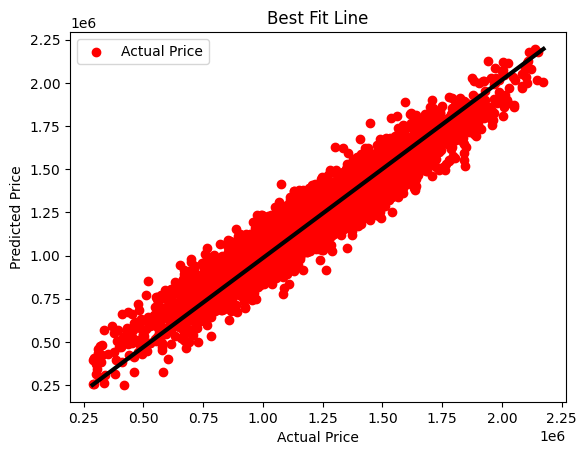

In [60]:
# For training data
evaluation(y_train, y_train_pred)

MSE : 10416445748.159271
RMSE : 102060.99033499171
MAE : 81661.79707163812
R2 Score : 0.9079420510252507


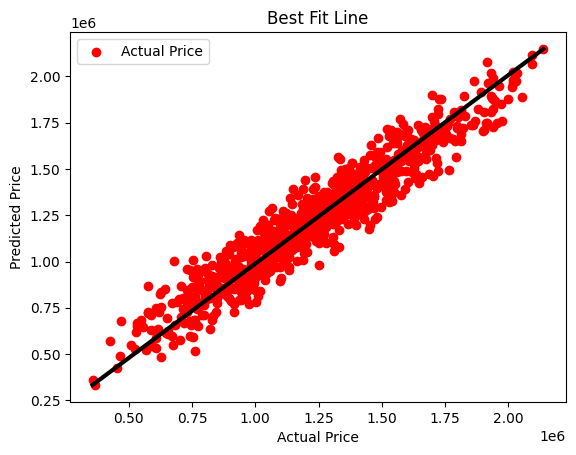

In [61]:
# For test data
evaluation(y_test, y_test_pred)